**Scientific Computation (MKP3303)**


>> R.U.Gobithaasan (2021). Scientific Computing, Lectures for Undergraduate Degree Program B.Sc (Applied Mathematics), Faculty of Ocean Engineering Technology & Informatics, University Malaysia Terengganu.
https://sites.google.com/site/gobithaasan/LearnTeach

<p align="center">
     © 2021 R.U. Gobithaasan All Rights Reserved.

</p>



**Chapter 5: Solution of Equation: Integration**   


**Symbolic Computing**
1. Symbolic computing: SymPy                                                 
2. Indefinite integral
3. Definite integral

**Numerical Computing**

4. Definite integral
5. Integration and its variations


References: 
- [SymPy](https://www.sympy.org/en/index.html)
-  [SciPi Lecture Notes](http://scipy-lectures.org/)
- Robert Johansson, Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib (2019, Apress).


# Symbolic computing: SymPy

There are two approches to solving a mathematical problem: 

   1. **Analytic method**: we employ algebraic manipulation to reach to an exact solution. This method may involve hand computation with just pencil and paper to solve the problem. 
   2. **Numerical method**: we develop step-by-step algorithm to rearch to an approximate solution, hence we may rely on a computer to do the computation.

- An example of analytic method is, we compute the root of a given quadratic equation by factoring them or use the well known solution.

- Whereas for numerical method, we may use Newton's method or Bisection method to compute the root of a quadratic equation.

- We usualy attempt to solve analytically, in case no exact solution exist, then we opt to numerical method. In scientific computing, the latter usualy the case.

- Computer algebra systems (CASs) are software which can carry out algebraic manipulation with a computer, similar to hand computation. Example of CAS is Wolfram Mathematica.

- We will use SymPy; it is a symbolic computing module for Python. 

In [1]:
from IPython.display import IFrame
doc = IFrame(src = 'https://www.sympy.org/en/features.html', width=1155, height=400)
display(doc)

In [2]:
#!pip install sympy

In [3]:
import sympy
print(sympy.__version__)

sympy.init_printing() # to print out mathematical equations

1.8


### Web-based symbolic computing 

1. Try out web based [SymPy](https://www.sympygamma.com/)
2. Try out web based [Mathematica called Wolfram Alpha](https://www.wolframalpha.com/input/?i=) 

### Bare basics: symbols

In [4]:
c = 7 # python declaration
print(type(c))

<class 'int'>


- n takes the value of 7 with `sympy`

In [5]:
n = sympy.Integer(7)
print(type(n))
n

<class 'sympy.core.numbers.Integer'>


- using `sympify`

In [6]:
p = sympy.sympify(7.5)
print(type(p))
p

<class 'sympy.core.numbers.Float'>


- We are declaring $x$ as a symbol

In [7]:
x = sympy.Symbol("x")
type(x)
print(x.is_Symbol, ',', x.is_integer)

True , None


- declaring integer type with sympy, its different compared to Python number type.

In [8]:
n.is_Symbol,n.is_real, n.is_Float, n.is_integer, n.is_Integer, n.is_positive, n.is_even, n.is_odd

(False, True, False, True, True, True, False, True)

- let's declare $m \in Z$ as a symbol

In [9]:
m = sympy.Symbol('m', integer = True)
print(m.is_integer, m.is_Integer, ',', m.is_Symbol)
type(m)

True False , True


sympy.core.symbol.Symbol

- let's declare $k =7.5 \in R$ as a symbol

In [10]:
k = sympy.Float(7.5)
print(type(k))
k.is_real, k.is_Integer, k.is_Float, k.is_Symbol,

<class 'sympy.core.numbers.Float'>


(True, False, True, False)

- two more methods declaring symbols, also notice number type setting.

In [11]:
x2 = sympy.Symbol("x4",  imaginery=True)
x3,x4 = sympy.symbols("x2, x3", real=True)
x5 = sympy.var("x4",  positive=True)

In [12]:
x2.is_imaginary, x3.is_Float, x4.is_real, x4.is_complex, x5.is_positive

(None, False, True, True, True)

- declare $\cos{\left(\pi c_{i} \right)}$, with $c_{1}$ as a symbol and $c_{2} \in Z$ 

In [13]:
c1= sympy.Symbol("c1")
c2= sympy.Symbol("c2", integer=True)

In [14]:
sympy.cos(c1 * sympy.pi)

In [15]:
sympy.cos(c2 * sympy.pi) # a  simplified expression

- SymPy keeps it as a symbol until we explicitly evaluate it as a number using `sympy.N`

In [16]:
sympy.sqrt(3)

In [17]:
sympy.N(sympy.sqrt(3)) # Numerical approximation

- declaring rational numbers: $r_1 = \frac{1}{2}$ and  $r_2 = \frac{3}{4}$ 

In [18]:
r1 = sympy.Rational(1,2)
r2 = sympy.Rational(3,4)
print(r1+r2)
print(r1/r2)

5/4
2/3


- special symbols:
 1. `sympy.pi`
 2. `sympy.E`: natural logarithm
 3. `sympy.I`: imaginary unit ($\sqrt{-1}$)
 4. `sympy.oo`: $\infty$

In [19]:
sympy.factorial(10)

- Whereas Python's math function tend to represent $\sqrt{3}$ as a approximated number

In [20]:
import math as m
m.sqrt(3)

### Declaring a function

- standard python `def`:

In [21]:
def yp(m,x,c):
    return m*x +c

type(yp)

function

In [22]:
yp(2,3,1) # substitude to get its corresponding y value

There are three types of SymPy functions:
1. undefined functions: cannot be evaluated numerically, will be useful for defining differential equation. 
2. standard `sympy` mathematical functions
3. Lambda anonymous functions: specific body for function evaluation

- represent function for algebraic manipulation

In [23]:
f = sympy.Function('f')(x) # x as an argument
print(type(f))
f

f


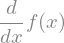

In [24]:
sympy.diff(f,x) #differentiation

In [25]:
m, x, c  = sympy.symbols('m,x,c')  # m,x,c as arguments
y = sympy.Function('y')(m,x,c)
print(type(y))
y

y


In [26]:
y.free_symbols

- built-in functions

In [27]:
type(sympy.factorial)

sympy.core.function.FunctionClass

In [28]:
sympy.factorial(x), sympy.factorial(5)

In [29]:
type(sympy.cos)

sympy.core.function.FunctionClass

In [30]:
sympy.cos(x), sympy.cos(sympy.pi)

- using **lambda** function

In [31]:
g = sympy.Lambda(x, abs(x))
print(type(g))
g

<class 'sympy.core.function.Lambda'>


In [32]:
g(-12), g(10.3)

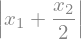

In [33]:
x1,x2 = sympy.symbols('x1,x2')
g(x1+x2/2)

### Expressions

-  represent mathematical formulation or a simple function as an **expression** in `sympy` for computation

In [34]:
m, x, c  = sympy.symbols('m,x,c')
y = m*x +c
type(y)

sympy.core.add.Add

In [35]:
y.args # list of all its arguments

In [36]:
y.args[1] # list the second argument

In [37]:
type(y.args[1])

sympy.core.mul.Mul

- substitution can be done easily by `subs` method:

In [38]:
y.subs(m,2)

In [39]:
y.subs(m,2).subs(c,1).subs(x,3)

In [40]:
values = {m:2, c:1, x:3}
y.subs(values)

### SymPy as the engine for Algebraic manipulation 

We can carry out the following manipulation with SymPy:
1. substitution (shown above)
2. expand, factor and collect
3. apart, together and cancel
4. simplification

#### 1. substitution

In [41]:
a,b,x = sympy.symbols('a,b,x')
f0 = ((a**2)+2*b + sympy.cos(x))
f0

In [42]:
f0.subs(a,2).subs(b,3)

In [43]:
val =  {a:2, b:3, x:sympy.pi}
f0.subs(val)

In [44]:
a,b,x = sympy.symbols('a,b,x')
((a**2)+2*b).subs(a,x).subs(b,3)

In [45]:
c = sympy.Symbol('c')
c = sympy.sqrt(a)
((a**2)+2*b).subs(b,c)

#### 2. expand, factor and collect

In [46]:
a,b,c, x = sympy.symbols('a,b,c,x')
f1 = (a*x**2 +c)*(-3*a*b*x + b**2)
f1

In [47]:
sympy.expand(f1)

In [48]:
print(_) # to print previous output

-3*a**2*b*x**3 + a*b**2*x**2 - 3*a*b*c*x + b**2*c


In [49]:
print(_42) # to print output number 42

cos(x) + 10


In [50]:
sympy.factor(-3*a**2*b*x**3 + a*b**2*x**2 - 3*a*b*c*x + b**2*c)

In [51]:
f2 = -3*a**2*b*x**3 + a*b**2*x**2 - 3*a*b*c*x + b**2*c;
f2.collect(x)

In [52]:
f2.collect(b)

#### 3. apart, together and cancel

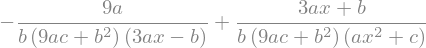

In [53]:
f2 = 1/(-3*a**2*b*x**3 + a*b**2*x**2 - 3*a*b*c*x + b**2*c);
sympy.apart(f2,x)

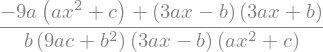

In [54]:
sympy.together(_)

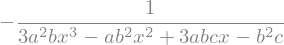

In [55]:
sympy.cancel(_) # cancel shared factors

#### 4. simplification

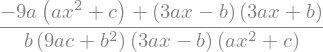

In [56]:
a,b,c, x = sympy.symbols('a,b,c,x')
f3 = (-9*a*(a*x**2 + c) + (3*a*x - b)*(3*a*x + b))/(b*(9*a*c + b**2)*(3*a*x - b)*(a*x**2 + c))
f3

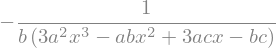

In [57]:
sympy.simplify(f3)

### Plotting using SymPy expression
- see [documentation](https://docs.sympy.org/latest/modules/plotting.html) 

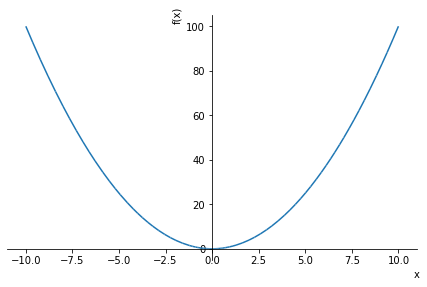

In [58]:
x = sympy.Symbol("x")
f = x*x
sympy.plot(f);

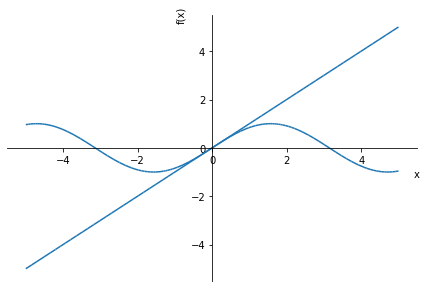

In [59]:
x = sympy.Symbol("x")
sympy.plot(x, sympy.sin(x), (x, -5, 5));

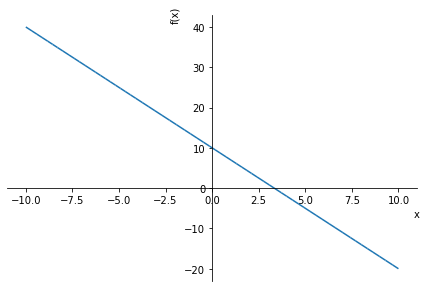

In [60]:
m, x, c  = sympy.symbols('m,x,c')
y = m*x +c
sympy.plot(y.subs({m:-3, c:10}));

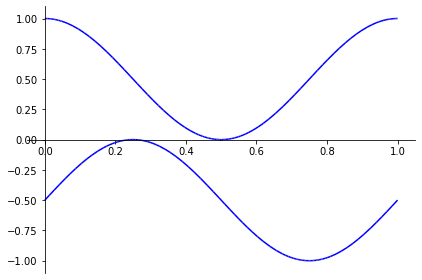

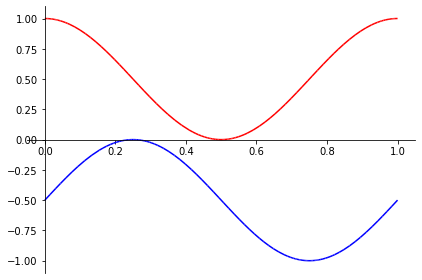

In [61]:
import sympy.plotting as splt
u = sympy.Symbol('u')
f1 = (u, sympy.cos(2*sympy.pi*u)/2 + 1/2)
f2 = (u, sympy.sin(2*sympy.pi*u)/2 - 1/2)
p = splt.plot_parametric(f1, f2, (u, 0, 1), line_color='blue');
p[0].line_color = 'red'
p.show()

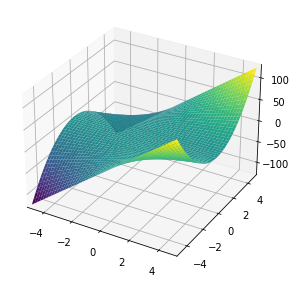

In [62]:
import sympy.plotting as splt
x, y = sympy.symbols('x,y')
splt.plot3d(x*y**2, (x, -5, 5), (y, -5, 5))

### Plotting with Matplotlib directly

- using `lambdify` to construct a function

In [63]:
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as pl
import numpy as np

f =  sympy.cos(2*sympy.cos(30*x))
fx = lambdify(x, f, modules = ['numpy']) # similar to function definition
print(type(fx))
f

<class 'function'>


In [64]:
fx(np.pi), fx(3)

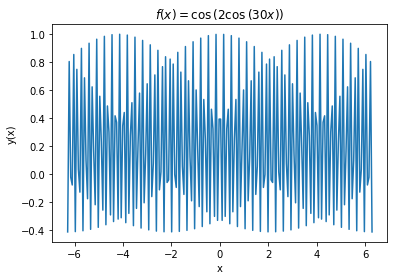

In [65]:


xval = np.linspace(-2*np.pi,2*np.pi,200)

pl.plot(xval,fx(xval));
pl.xlabel('x');
pl.ylabel('y(x)');
pl.title('$f(x) = \cos{(2 \cos{(30 x)})}$');

---
<div class="alert alert-block alert-info">
<b>Note:</b> The integrals module in SymPy implements methods to calculate definite and indefinite integrals.
</div>


# Integral

## Indefinete integral

A primitive integral in the form of
$$\int f(x) dx $$
is also known as **indefinete integral** or antiderivative or inverse derivative. 

<class 'sympy.integrals.integrals.Integral'>


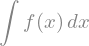

In [66]:
x,y = sympy.symbols('x,y')
f = sympy.Function('f')(x)
I1 = sympy.integrate(f,x)
print(type(I1))
I1

- we can integrate multivariate expressions 

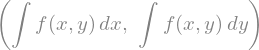

In [67]:
f = sympy.Function('f')(x,y)
I2 = sympy.integrate(f,x)
I3 = sympy.integrate(f,y)
I2, I3

- or carry out double integration

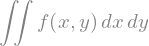

In [68]:
I4 = sympy.integrate(f,x,y)
I4

- For example $$\int (x^{2} + x + 1) dx$$ where we declared the variable `x` as a symbol of `sympy`.
- we can directly plot the integration output using `sympy.plt`, by default `sympy` sets a suitable **limit**, making it a definite integral:

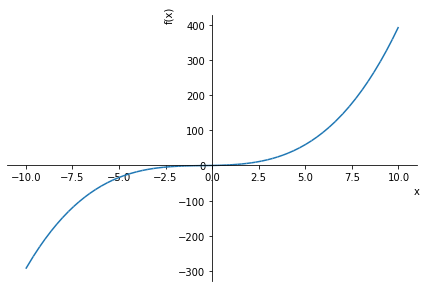

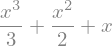

In [69]:
x = sympy.Symbol("x")
f = sympy.integrate(x**2 + x + 1, x)
sympy.plot(f);
f

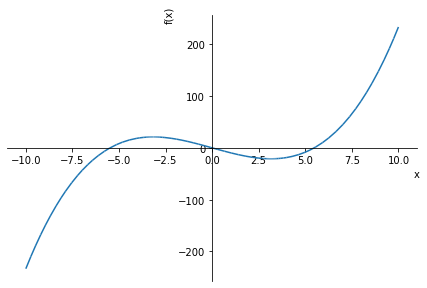

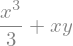

In [70]:
x = sympy.Symbol("x")
I5 = sympy.integrate(x**2 + y , x)
sympy.plot(I5.subs(y,-10));
I5

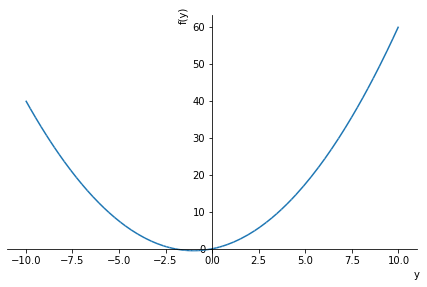

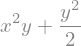

In [71]:
x = sympy.Symbol("x")
I6 = sympy.integrate(x**2 + y , y)
sympy.plot(I6.subs(x,1));
I6

In [72]:
print(_)

x**2*y + y**2/2


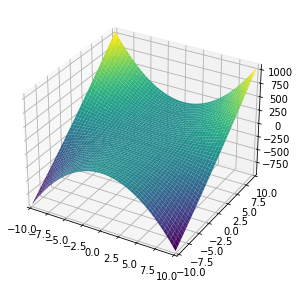

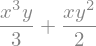

In [73]:
import sympy.plotting as splt
x = sympy.Symbol("x")
I7 = sympy.integrate(x**2 + y , x, y)
splt.plot3d(x**2*y + y**2/2)
I7

## Definite integral

- we can set a suitable **limit** $x \in [a,b]$, making it a definite integral:

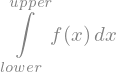

In [74]:
a,b,x,y = sympy.symbols('lower,upper,x,y')
f = sympy.Function('f')(x)
I8 = sympy.integrate(f,(x,a,b))
I8

- we can set the **limits** to $\infty$

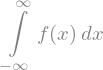

In [75]:
I9 = sympy.integrate(f,(x,-sympy.oo,sympy.oo))
I9

- for example, $\int_0^{\pi/3} tan(x) dx$

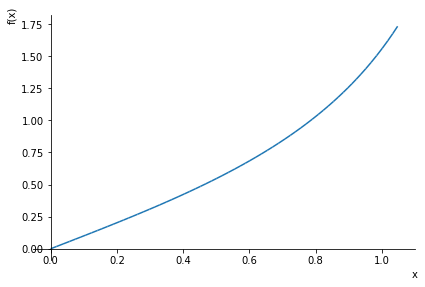

In [76]:
x = sympy.Symbol("x")
f = sympy.tan(x)
sympy.plot(f, (x, 0, sympy.pi/3));

In [77]:
sympy.integrate(f, (x,0, sympy.pi/3))

# Lecture to be con'd...

---
# Numerical Computing

In [78]:
from IPython.display import IFrame
doc = IFrame(src = 'https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html', width=1155, height=400)
display(doc)

- Analytical Approah: Definite integral using SymPy

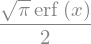

In [79]:
x = sympy.Symbol('x')
fsym = sympy.integrate(sympy.exp(-x**2))
fsym

In [80]:
fsym.subs(x,1) - fsym.subs(x,-1)

In [81]:
print(sympy.N(_))

1.49364826562485


- Numerical Approach: Definite integral using `SciPy`

In [82]:
from scipy import integrate

def f(x):
    return np.exp(-x**2)

val, err = integrate.quad(f, -1, 1)

In [ ]:
val, err

# Integrations and its applications

In [ ]:
f = sympy.integrate(x**2 + x + 1, x)
f

In [ ]:
f.subs(x,1)